<a href="https://colab.research.google.com/github/gahz8212/python/blob/master/%EC%B9%B4%ED%8E%98%EB%B0%A9%EB%AC%B8%EC%9E%90%EC%88%98%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import datetime as dt

In [7]:
df=pd.read_csv('/content/drive/MyDrive/arima/cafe_daily_visitors_2y.csv',parse_dates=['ds'])
df

,ds,y
0,2023-01-01,160
1,2023-01-02,119
2,2023-01-03,126
3,2023-01-04,133
4,2023-01-05,119
...,...,...
726,2024-12-27,159
727,2024-12-28,210
728,2024-12-29,203
729,2024-12-30,154


In [8]:
df.dtypes

,0
ds,datetime64[ns]
y,int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      731 non-null    datetime64[ns]
 1   y       731 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.6 KB


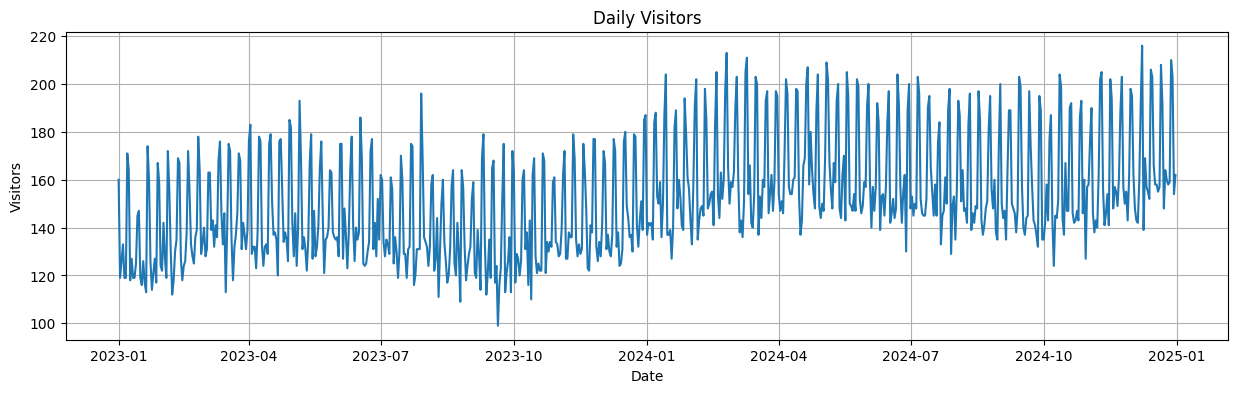

In [16]:
plt.figure(figsize=(15,4))
plt.plot(df['ds'],df['y'])
plt.title('Daily Visitors')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.grid(True)
plt.show()


In [131]:
from re import T
model=Prophet(growth='linear',daily_seasonality=True,yearly_seasonality=True)
model.fit(df)

In [132]:
future=model.make_future_dataframe(periods=30,freq='D')
future

,ds
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
756,2025-01-26
757,2025-01-27
758,2025-01-28
759,2025-01-29


In [133]:
forecast=model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,153.971200,153.066632,172.591542,153.971200,153.971200,8.784868,8.784868,8.784868,-23.748614,...,30.330076,30.330076,30.330076,2.203406,2.203406,2.203406,0.0,0.0,0.0,162.756068
1,2023-01-02,154.032062,111.992183,131.806653,154.032062,154.032062,-32.791283,-32.791283,-32.791283,-23.748614,...,-11.396147,-11.396147,-11.396147,2.353478,2.353478,2.353478,0.0,0.0,0.0,121.240779
2,2023-01-03,154.092923,109.308056,129.153774,154.092923,154.092923,-34.432873,-34.432873,-34.432873,-23.748614,...,-13.150707,-13.150707,-13.150707,2.466448,2.466448,2.466448,0.0,0.0,0.0,119.660050
3,2023-01-04,154.153785,111.211233,131.484429,154.153785,154.153785,-33.029985,-33.029985,-33.029985,-23.748614,...,-11.825642,-11.825642,-11.825642,2.544272,2.544272,2.544272,0.0,0.0,0.0,121.123800
4,2023-01-05,154.214646,109.533503,130.087128,154.214646,154.214646,-33.946112,-33.946112,-33.946112,-23.748614,...,-12.787073,-12.787073,-12.787073,2.589575,2.589575,2.589575,0.0,0.0,0.0,120.268534


In [134]:
forecast.tail()#학습용 row 뒤에 예상한 날짜만큼 row를 붙여줌
#예측한 값을 보고 싶으면 전체 df의 마지막 부분을 보아야 함.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
756,2025-01-26,198.055684,197.745459,217.080901,198.052728,198.058518,9.377681,9.377681,9.377681,-23.748614,...,30.330076,30.330076,30.330076,2.796219,2.796219,2.796219,0.0,0.0,0.0,207.433365
757,2025-01-27,198.112081,155.557182,176.607071,198.108842,198.115049,-32.164691,-32.164691,-32.164691,-23.748614,...,-11.396147,-11.396147,-11.396147,2.980070,2.980070,2.980070,0.0,0.0,0.0,165.947390
758,2025-01-28,198.168478,154.145252,174.531928,198.164980,198.171723,-33.720181,-33.720181,-33.720181,-23.748614,...,-13.150707,-13.150707,-13.150707,3.179141,3.179141,3.179141,0.0,0.0,0.0,164.448298
759,2025-01-29,198.224875,156.328166,175.980538,198.221151,198.228474,-32.182690,-32.182690,-32.182690,-23.748614,...,-11.825642,-11.825642,-11.825642,3.391566,3.391566,3.391566,0.0,0.0,0.0,166.042186
760,2025-01-30,198.281273,154.753626,175.879459,198.277298,198.285059,-32.920222,-32.920222,-32.920222,-23.748614,...,-12.787073,-12.787073,-12.787073,3.615465,3.615465,3.615465,0.0,0.0,0.0,165.361050


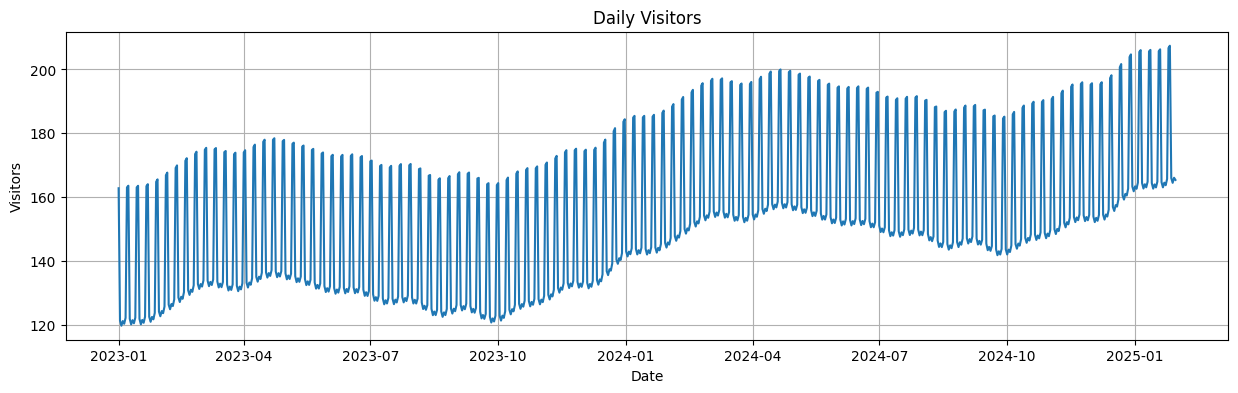

In [135]:
plt.figure(figsize=(15,4))
plt.plot(forecast['ds'],forecast['yhat'])
plt.title('Daily Visitors')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.grid(True)
plt.show()

In [35]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [36]:
forecast[['ds','trend', 'yhat','yhat_lower', 'yhat_upper']].tail(10)

,ds,trend,yhat,yhat_lower,yhat_upper
751,2025-01-21,197.773698,163.035298,153.300166,172.094038
752,2025-01-22,197.830096,164.501820,155.037384,174.435226
753,2025-01-23,197.886493,163.703788,154.396006,173.999360
754,2025-01-24,197.942890,165.667180,155.223218,176.358732
755,2025-01-25,197.999287,206.717784,196.109038,216.377942
756,2025-01-26,198.055684,207.433365,197.329142,217.181568
757,2025-01-27,198.112081,165.947390,155.441178,176.007599
758,2025-01-28,198.168478,164.448298,154.095637,174.663434
759,2025-01-29,198.224875,166.042186,155.202225,175.810434
760,2025-01-30,198.281273,165.361050,154.837467,175.663614


###############################아리마모델

In [37]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/arima/cafe_daily_visitors_2y.csv',parse_dates=['ds'])
df

,ds,y
0,2023-01-01,160
1,2023-01-02,119
2,2023-01-03,126
3,2023-01-04,133
4,2023-01-05,119
...,...,...
726,2024-12-27,159
727,2024-12-28,210
728,2024-12-29,203
729,2024-12-30,154


In [47]:

#arima모델은 날짜타입의 컬럼이 반드시 인덱스로 설정되어 있어야 함.
#arima모델에서 사용할 수 있는 데이터 형식은 index(날짜)+값이 들어있는 컬럼
#arima모델에서는 컬럼명 상관없음
series=df.set_index('ds')['y']
series.info()

#검증은
#훈련데이터+테스트데이터를 나누어서
#훈련데이터로 훈련을 하고, 테스트데이터로 검증을 함.
#전체 2년치 데이터중 60일치만 남기고 훈련데이터로 사용하겠음
train=series[:-60]
test=series.iloc[-60:]
#train데이터로 훈련시키자.
model=ARIMA(train,order=(1,1,1))
fit=model.fit()



<class 'pandas.core.series.Series'>
DatetimeIndex: 731 entries, 2023-01-01 to 2024-12-31
Series name: y
Non-Null Count  Dtype
--------------  -----
731 non-null    int64
dtypes: int64(1)
memory usage: 11.4 KB


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [52]:
forecast_res=fit.get_forecast(steps=60)
pred_mean=forecast_res.predicted_mean
conf_int=forecast_res.conf_int()
conf_int

,lower y,upper y
2024-11-02,118.514122,197.451817
2024-11-03,116.462901,199.492890
2024-11-04,116.167382,199.785386
2024-11-05,116.086834,199.865034
2024-11-06,116.044261,199.907338
2024-11-07,116.010716,199.940803
2024-11-08,115.979671,199.971825
2024-11-09,115.949366,200.002122
2024-11-10,115.919296,200.032190
2024-11-11,115.889310,200.062176


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54168 (\N{HANGUL SYLLABLE PE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

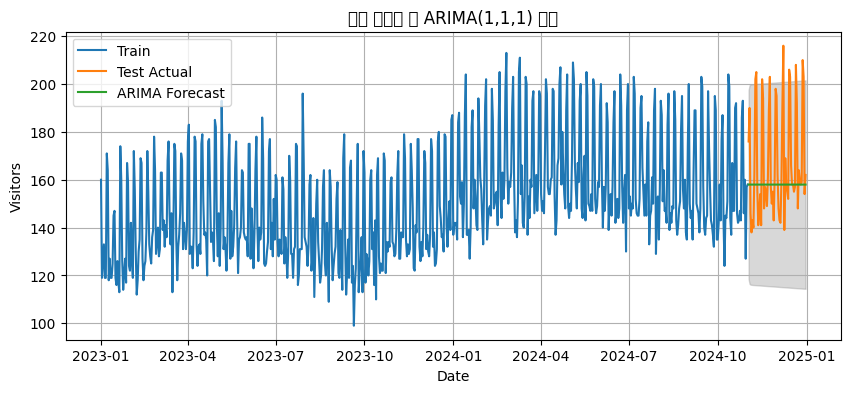

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test Actual")
plt.plot(pred_mean.index, pred_mean, label="ARIMA Forecast")
plt.fill_between(pred_mean.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color="gray", alpha=0.3)
plt.title("카페 방문자 수 ARIMA(1,1,1) 예측")
plt.xlabel("Date")
plt.ylabel("Visitors")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# 전체 데이터로 훈련시키자.
model = ARIMA(series, order=(1,1,1))
fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [56]:
forecast_res = fit.get_forecast(steps=30)
pred_mean = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

아리마와 메타를 합해서

In [73]:
conf_int['yhat'] = (conf_int['upper y'] + conf_int['lower y'])/2
conf_int

,lower y,upper y,yhat
2025-01-01,125.314236,204.926780,165.120508
2025-01-02,124.164148,207.950490,166.057319
2025-01-03,124.144831,208.532290,166.338560
2025-01-04,124.148217,208.697768,166.422992
2025-01-05,124.131215,208.765464,166.448339
2025-01-06,124.105671,208.806227,166.455949
2025-01-07,124.077355,208.839112,166.458234
2025-01-08,124.048202,208.869636,166.458919
2025-01-09,124.018810,208.899440,166.459125
2025-01-10,123.989360,208.929014,166.459187


In [74]:
meta = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(30)
meta

,ds,yhat,yhat_lower,yhat_upper
731,2025-01-01,163.354673,153.200626,173.580289
732,2025-01-02,162.580961,152.554931,172.880459
733,2025-01-03,164.511291,154.747301,175.062670
734,2025-01-04,205.474875,195.244431,215.855408
735,2025-01-05,206.053823,196.389473,216.650138
736,2025-01-06,164.386713,154.941937,174.077045
737,2025-01-07,162.667686,153.026249,173.123611
738,2025-01-08,164.008963,154.264120,173.789278
739,2025-01-09,163.048908,153.143436,173.734967
740,2025-01-10,164.818868,155.083823,175.633780


In [75]:
conf_int.index #아리마는 날짜가 index로 잡혀있음. 그래프에 x축에 날짜를 넣기 위함

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10', '2025-01-11', '2025-01-12',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-25', '2025-01-26', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30'],
              dtype='datetime64[ns]', freq='D')

In [76]:
meta.index #날짜가 인덱스에 없고 ds컬럼에 들어있음.

RangeIndex(start=731, stop=761, step=1)

In [77]:
meta['ds'].head()

,ds
731,2025-01-01
732,2025-01-02
733,2025-01-03
734,2025-01-04
735,2025-01-05


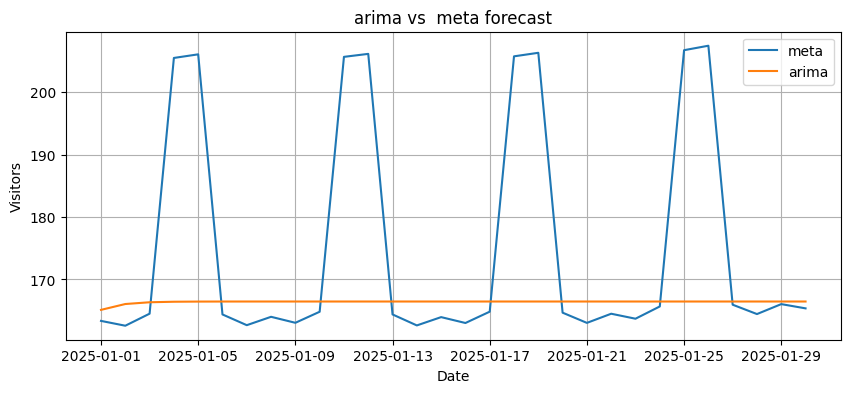

In [78]:
plt.figure(figsize=(10,4))
plt.plot(meta['ds'], meta['yhat'], label="meta")
plt.plot(conf_int.index, conf_int['yhat'], label="arima")
plt.title("arima vs  meta forecast")
plt.xlabel("Date")
plt.ylabel("Visitors")
plt.legend() #범례
plt.grid(True)
plt.show()

In [80]:
conf_int['yhat'] = (conf_int['upper y'] + conf_int['lower y'])/2
conf_int

,lower y,upper y,yhat
2025-01-01,125.314236,204.926780,165.120508
2025-01-02,124.164148,207.950490,166.057319
2025-01-03,124.144831,208.532290,166.338560
2025-01-04,124.148217,208.697768,166.422992
2025-01-05,124.131215,208.765464,166.448339
2025-01-06,124.105671,208.806227,166.455949
2025-01-07,124.077355,208.839112,166.458234
2025-01-08,124.048202,208.869636,166.458919
2025-01-09,124.018810,208.899440,166.459125
2025-01-10,123.989360,208.929014,166.459187


In [81]:
meta = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(30)
meta

,ds,yhat,yhat_lower,yhat_upper
731,2025-01-01,163.354673,153.200626,173.580289
732,2025-01-02,162.580961,152.554931,172.880459
733,2025-01-03,164.511291,154.747301,175.062670
734,2025-01-04,205.474875,195.244431,215.855408
735,2025-01-05,206.053823,196.389473,216.650138
736,2025-01-06,164.386713,154.941937,174.077045
737,2025-01-07,162.667686,153.026249,173.123611
738,2025-01-08,164.008963,154.264120,173.789278
739,2025-01-09,163.048908,153.143436,173.734967
740,2025-01-10,164.818868,155.083823,175.633780


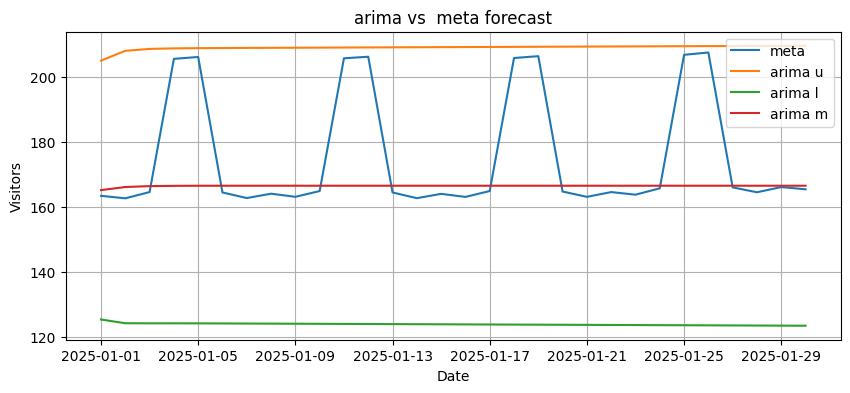

In [85]:
plt.figure(figsize=(10,4))
plt.plot(meta['ds'], meta['yhat'], label="meta")
plt.plot(conf_int.index, conf_int['upper y'], label="arima u")
plt.plot(conf_int.index, conf_int['lower y'], label="arima l")
plt.plot(conf_int.index, (conf_int['upper y']+conf_int['lower y'])/2, label="arima m")
plt.title("arima vs  meta forecast")
plt.xlabel("Date")
plt.ylabel("Visitors")
plt.legend() #범례
plt.grid(True)
plt.show()

In [95]:
df['weekday']=forecast['ds'].dt.weekday
df['weekday'].value_counts()
df['is_weekend']=df['weekday'].apply(lambda x: 1 if x>=5 else 0)
df['is_weekend'].value_counts()

,count
is_weekend,
0,522
1,209


In [96]:
mean_weekday_visitor=df[df['is_weekend']==0]['y'].mean()
mean_weekend_visitor=df[df['is_weekend']==1]['y'].mean()

In [97]:
mean_weekday_visitor,mean_weekend_visitor

(np.float64(139.860153256705), np.float64(182.0))

In [99]:
group_mean=df.groupby('is_weekend')['y'].mean()
group_mean

,y
is_weekend,
0,139.860153
1,182.000000


<BarContainer object of 2 artists>

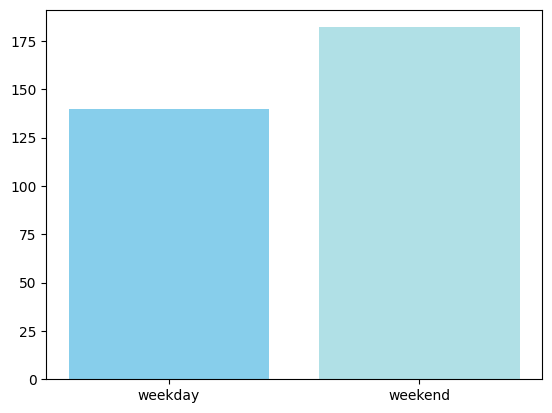

In [101]:
plt.bar(['weekday','weekend'],[mean_weekday_visitor,mean_weekend_visitor],color=['skyblue','powderblue'])

In [102]:
df['weekday_name']=df['ds'].dt.day_name()
df

,ds,y,weekday,is_weekend,weekday_name
0,2023-01-01,160,6,1,Sunday
1,2023-01-02,119,0,0,Monday
2,2023-01-03,126,1,0,Tuesday
3,2023-01-04,133,2,0,Wednesday
4,2023-01-05,119,3,0,Thursday
...,...,...,...,...,...
726,2024-12-27,159,4,0,Friday
727,2024-12-28,210,5,1,Saturday
728,2024-12-29,203,6,1,Sunday
729,2024-12-30,154,0,0,Monday


In [120]:
mean_wkname=df.groupby('weekday_name')['y'].mean().sort_values()
mean_wkname


,y
weekday_name,
Tuesday,138.819048
Thursday,139.076923
Wednesday,139.980769
Monday,140.514286
Friday,140.913462
Saturday,181.817308
Sunday,182.180952


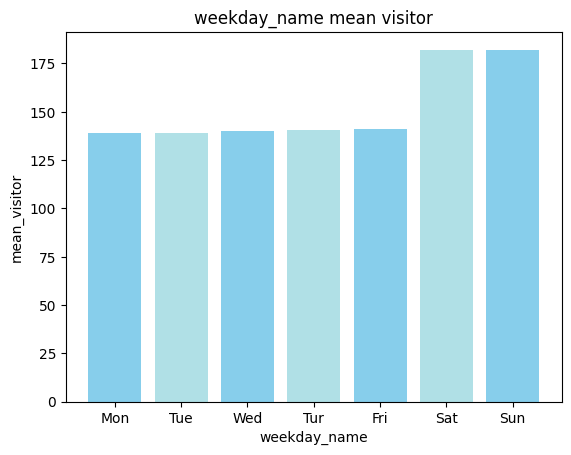

In [125]:
plt.bar(['Mon','Tue','Wed','Tur','Fri','Sat','Sun'],mean_wkname,color=['skyblue','powderblue'])
plt.title('weekday_name mean visitor')
plt.xlabel('weekday_name')
plt.ylabel('mean_visitor')
plt.show()